This part of the process is mainly done by Data Analysts or Data Scientists.
This notebook is based on the information and instructions from the website:

https://www.geeksforgeeks.org/wine-quality-prediction-machine-learning/


## Wine Quality Classifier (Data Explorations and Preparations):
* [Install and load packages](#install-and-load-packages)
* [Data Explorations & Feature Engineering](#data-explorations-&-feature-engineering)
* [Raw Data to Training, Testing, and Validaiton](#raw-data-to-training,-testing,-and-validation)

# Install and Load Packages

In [1]:
!python --version

Python 3.9.4


In [4]:
!pip install -r requirements.txt

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import os

from sklearn.model_selection import train_test_split
 
import warnings
warnings.filterwarnings('ignore')

# Data Explorations & Feature Engineering

In [47]:
# Reading the data
df = pd.read_csv('raw_data/wine-quality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Print out some information about the dataset
* Name of each feature or column
* data type of each feature columns present in the dataset.
* How many non-null values are in the dataset 

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


 Exploring some statistical analysis of the dataset. 
 * Mean values (mean):
 * (std):
 * Minimum value (min):
 * 

In [49]:
#descriptive statistical measures of the dataset.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


It is important to examine, how many null values are in the dataset. 
Because in the training process these null values could impede or diminish the model performance.

In [50]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

If there are missing values, we could impute them by means as the data present in the different columns are continuous values.


In [51]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()

np.int64(0)

Distribution of the could be observed in a histogram plot of the dataset.

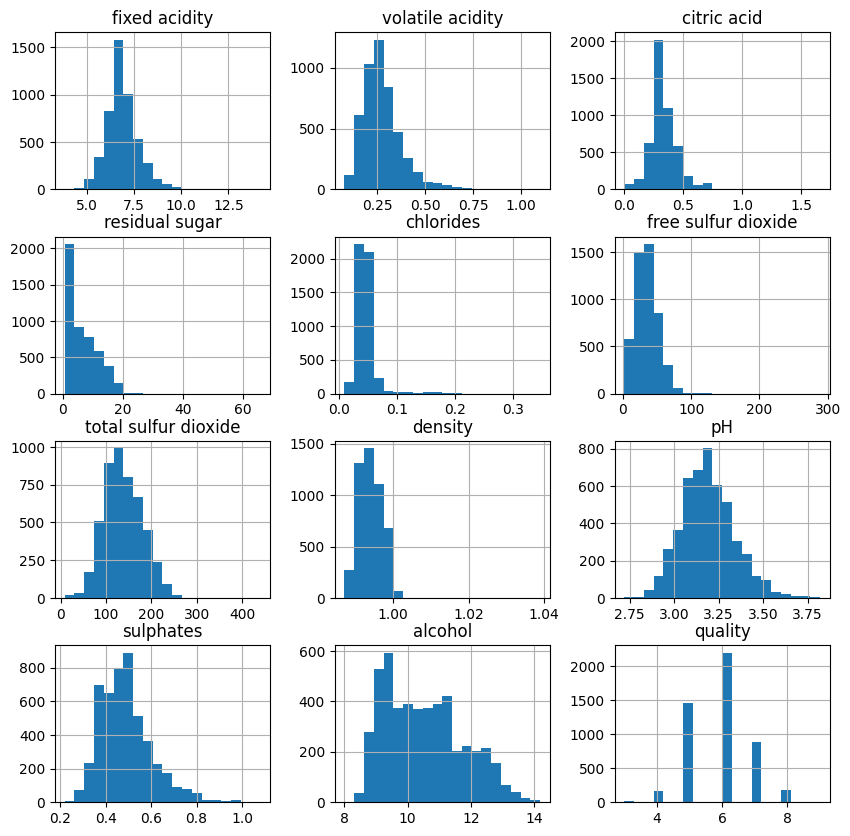

In [52]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

How much alcohol is present in each wine quality?

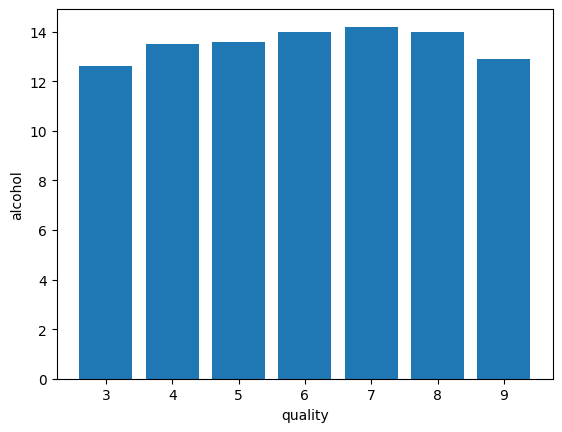

In [53]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

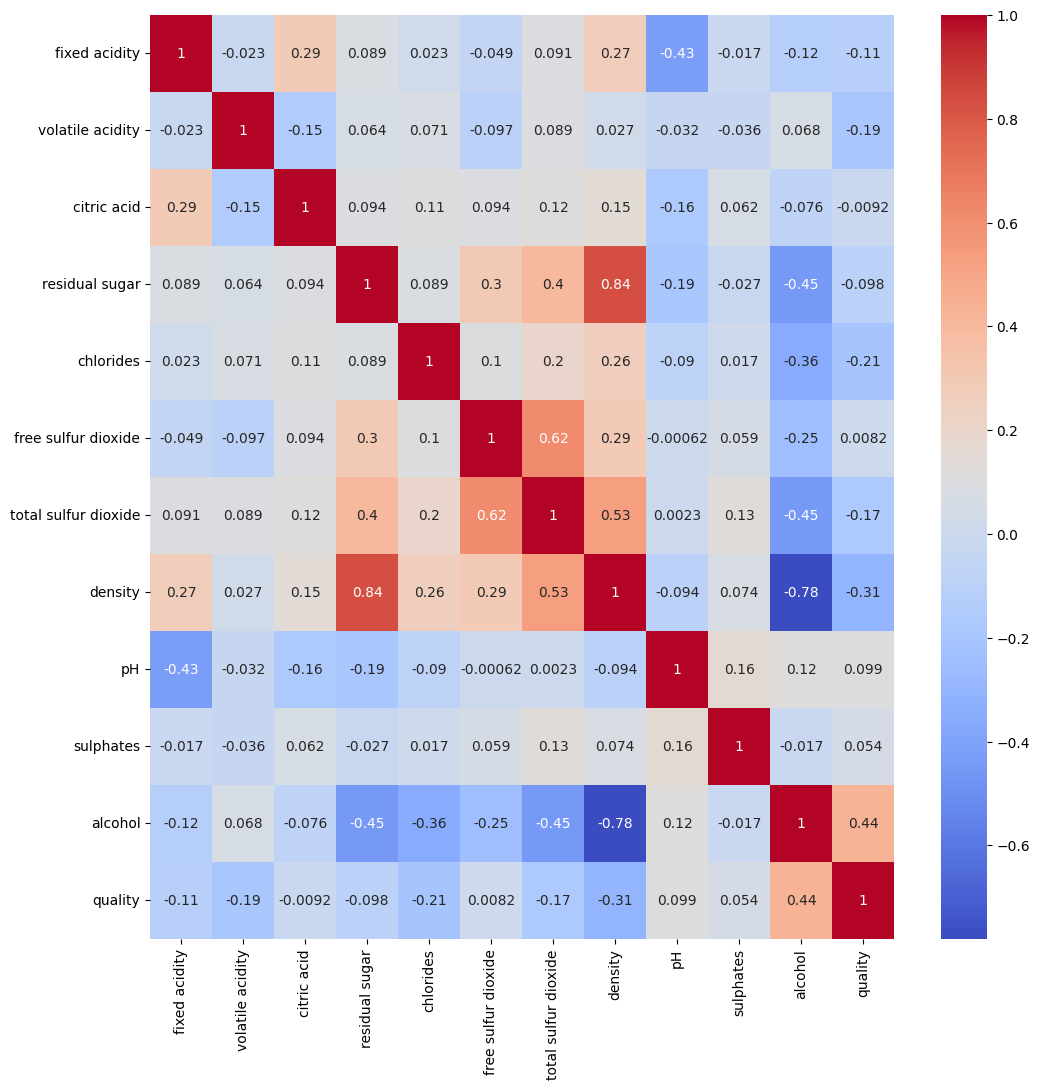

In [54]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() , annot=True, cmap = 'coolwarm',cbar=True)
plt.show()

In [55]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

In [56]:
# How many wines from each quality are there in the dataset
df['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

With bar charts we take a look at the distribution of the labled classes (i.e wine qualities) for this classifiction problem. 

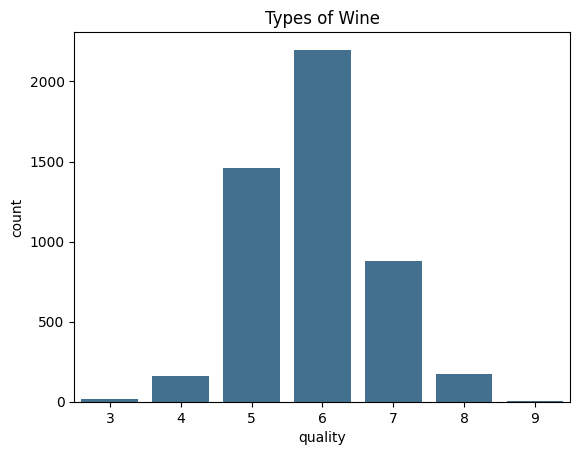

In [57]:
# Plot quality classification 
df['quality'].value_counts()
      
plt.figure(num=None)
sb.countplot(data = df, x = 'quality', saturation=0.5)
plt.title("Types of Wine")
plt.show()

In [58]:
#df = df.drop('total sulfur dioxide', axis=1)

Classify the wine qualites in two classes. 
Sometimes it is more informative to rearrange the dataset or labels in order to help with the model performance.

Therefore, here we separate the wine qualities more than 5 in a class (1) and less than 5 in another class (0).
And create a new column called "best quality".

In [59]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [61]:
df.head(n=15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,1


In [62]:
df_processed = df.drop(['quality'], axis=1)
df_processed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


# Raw Data to Training, Testing, and Validaiton

In [63]:
# Split the dataset into training (60%), and temp (40% for testing + validation)
train_df, temp_df = train_test_split(df_processed, test_size=0.3, random_state=42)

# Further split temp into testing (20%) and performance (20%)
test_df, perf_df = train_test_split(temp_df, test_size=0.2, random_state=42)
print("Datasets have been split")

Datasets have been split


In [65]:
print("Number of items in the original processed DataFrame:", len(df_processed))
print("Number of items in the training DataFrame (70%):", len(train_df))
print("Number of items in the testing DataFrame (25%):", len(test_df))
print("Number of items in the performance DataFrame (5%):", len(perf_df))

Number of items in the original processed DataFrame: 4898
Number of items in the training DataFrame (70%): 3428
Number of items in the testing DataFrame (25%): 1176
Number of items in the performance DataFrame (5%): 294


In [69]:
# Save the datasets to separate CSV files
# please remove the directories if they exist.
df_dirs = ["training_data", "testing_data", "performance_data"]

for df_dir in df_dirs:
    # Create the directory
    if not os.path.exists(df_dir):
        os.mkdir(df_dir)
        print(f"Directory '{df_dir}' created successfully!")
    else:
        print(f"Directory '{df_dir}' already exists. Please delete the dir and start again.")

train_df.to_csv('training_data/train_dataset.csv', index=False)
test_df.to_csv('testing_data/test_dataset.csv', index=False)
perf_df.to_csv('performance_data/perf_dataset.csv', index=False)
print("Datasets have been saved as CSV files in their corresponding directory.")

Directory 'training_data' created successfully!
Directory 'testing_data' created successfully!
Directory 'performance_data' created successfully!
Datasets have been saved as CSV files in their corresponding directory.


IGNORE BELOW CELL: Save the processed data to file "*training_data/winequality-red.csv*".

In [45]:
# df_dir = ["training_data", "testing_data", "performance_data"]

# for df_name in df_dir:
#     !mkdir f"{df_name}"
#     print(os.listdir('training_data'))

#     file_path = 'training_data/winequality-red.csv' # Replace with your file path

#     if os.path.exists(file_path):  # Check if the file exists
#         os.remove(file_path)  # Delete the file
#         print(f"{file_path} has been deleted.")

#     import os
#     print(os.listdir('training_data'))

#     df_train.to_csv(f'{file_path}', index=False)

#     import os
#     print(os.listdir('training_data'))